In [ ]:
import pandas as pd
import os
from sklearn.model_selection import ParameterGrid, train_test_split, learning_curve
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.metrics import classification_report
from tabulate import tabulate
import matplotlib.pyplot as plt

In [ ]:
current_dir = os.getcwd()
relative_path = os.path.join('..','..', 'data', 'x_train.csv')
x_train=pd.read_csv(os.path.join(current_dir, relative_path))
relative_path = os.path.join('..','..', 'data', 'y_train.csv')
y_train=pd.read_csv(os.path.join(current_dir, relative_path))

relative_path = os.path.join('..','..', 'data', 'x_val.csv')
x_val=pd.read_csv(os.path.join(current_dir, relative_path))
relative_path = os.path.join('..','..', 'data', 'y_val.csv')
y_val=pd.read_csv(os.path.join(current_dir, relative_path))

relative_path = os.path.join('..','..', 'data', 'x_test.csv')
x_test=pd.read_csv(os.path.join(current_dir, relative_path))
relative_path = os.path.join('..','..', 'data', 'y_test.csv')
y_test=pd.read_csv(os.path.join(current_dir, relative_path))

In [ ]:
warnings.filterwarnings("ignore")
# Define the parameter grid
param_grid = {
    'C': [0.1, 1.0, 10.0],           # Regularization parameter
    'max_iter': [100, 200, 300, 400, 500],  # Maximum number of iterations
    # suitable for sparse data (data is sparse because of encoding text)
    'solver': ['sag', 'saga']        # Solver for optimization
}


# Initialize logistic regression model
logistic_regression = LogisticRegression()

# Perform grid search
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best logistic regression model
best_logistic_regression = grid_search.best_estimator_
# Get the best parameters
best_params = grid_search.best_params_

print("Best Parameters:", best_params)

Best Parameters: {'C': 1.0, 'max_iter': 100, 'solver': 'sag'}


In [ ]:
base_c = best_params['C']
solver = best_params['solver']
max_iter = best_params['max_iter']
print(f'Best C: {base_c}')
print(f'Best Max Iterations: {max_iter}')
print(f'Best solver: {solver}')

Best C: 1.0
Best Max Iterations: 100
Best solver: sag


Get The Training Accuracy

In [ ]:
# Predict on the training set
y_train_pred = best_logistic_regression.predict(x_train)

# Calculate training accuracy (in-sample error)
training_accuracy = accuracy_score(y_train, y_train_pred)

print("Training Accuracy:", training_accuracy)

weighted_f1 = f1_score(y_train, y_train_pred, average='weighted')

print("Training Weighted F1-score:", weighted_f1)

Training Accuracy: 0.8638297872340426
Training Weighted F1-score: 0.8339308383689636


Get The Validation Accuracy

In [ ]:
# Predict on the validation set
y_val_pred = best_logistic_regression.predict(x_val)

val_accuracy = best_logistic_regression.score(x_val, y_val)
print("Validation Accuracy:", val_accuracy)

weighted_f1 = f1_score(y_val, y_val_pred, average='weighted')

print("Test Weighted F1-score:", weighted_f1)

Validation Accuracy: 0.8601694915254238
Validation Weighted F1-score: 0.834821243569327


Classification report

In [ ]:
# Predict on validation set
y_val_pred = best_logistic_regression.predict(x_val)

# Calculate precision, recall, and F1-score
report = classification_report(y_val, y_val_pred, target_names=['Class 0', 'Class 1'])

# Print the classification report
print("Classification Report for Validation Set:")
print(report)

Classification Report for Validation Set:
              precision    recall  f1-score   support

     Class 0       0.86      0.98      0.92       191
     Class 1       0.83      0.33      0.48        45

    accuracy                           0.86       236
   macro avg       0.85      0.66      0.70       236
weighted avg       0.86      0.86      0.83       236



Confusion Matrix

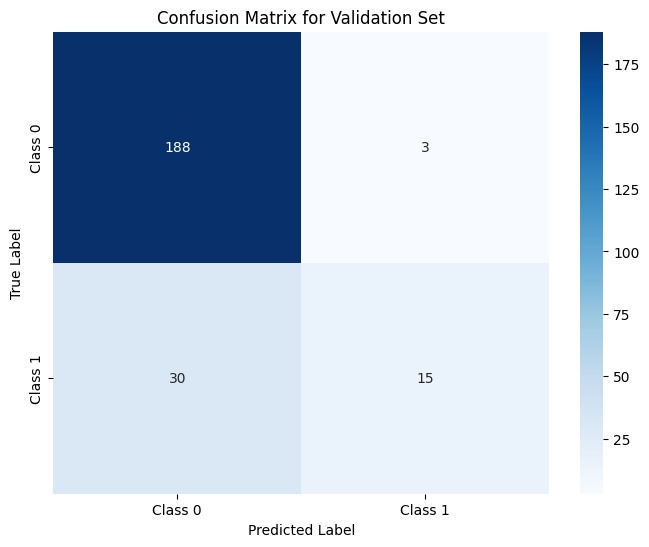

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for Validation Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Plot Learning Curve with scores

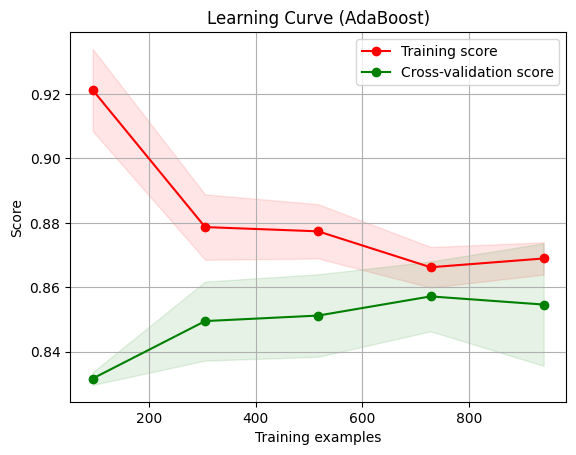

In [ ]:
warnings.filterwarnings("ignore")
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

X = np.concatenate((x_train, x_val), axis=0)
y = np.concatenate((y_train, y_val), axis=0)

# Plot learning curve
plot_learning_curve(best_logistic_regression, "Learning Curve (AdaBoost)", X, y, cv=5)
plt.show()

In [17]:
'''
The decreasing training score suggests that as more training examples are provided, the model is exposed to a wider variety of instances and is learning to generalize better.
This is a positive sign as it indicates that the model is not memorizing the training data but rather learning meaningful patterns.

The increasing validation score indicates that the model's performance on unseen data is improving as more training examples are provided.
This suggests that the model is generalizing well to new instances and is not overfitting to the training data.

The small gap between the training and validation scores suggests that the model is not suffering from significant overfitting.
The fact that both scores are increasing with a small gap indicates that the model is learning to generalize well to unseen data without excessively fitting to the training data.
'''

"\nThe decreasing training score suggests that as more training examples are provided, the model is exposed to a wider variety of instances and is learning to generalize better.\nThis is a positive sign as it indicates that the model is not memorizing the training data but rather learning meaningful patterns.\n\nThe increasing validation score indicates that the model's performance on unseen data is improving as more training examples are provided.\nThis suggests that the model is generalizing well to new instances and is not overfitting to the training data.\n\nThe small gap between the training and validation scores suggests that the model is not suffering from significant overfitting.\nThe fact that both scores are increasing with a small gap indicates that the model is learning to generalize well to unseen data without excessively fitting to the training data.\n"

Plot Learning Curve with errors

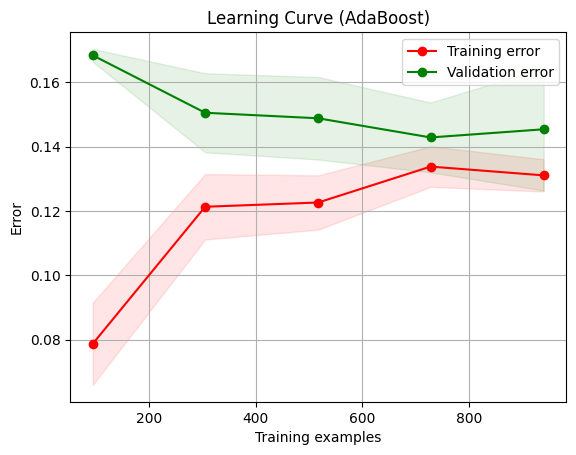

In [16]:
warnings.filterwarnings("ignore")
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the training and validation learning curve.
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Error")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_squared_error')
    train_errors_mean = -np.mean(train_scores, axis=1)
    train_errors_std = np.std(train_scores, axis=1)
    test_errors_mean = -np.mean(test_scores, axis=1)
    test_errors_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_errors_mean - train_errors_std,
                     train_errors_mean + train_errors_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_errors_mean - test_errors_std,
                     test_errors_mean + test_errors_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_errors_mean, 'o-', color="r",
             label="Training error")
    plt.plot(train_sizes, test_errors_mean, 'o-', color="g",
             label="Validation error")

    plt.legend(loc="best")
    return plt

X = np.concatenate((x_train, x_val), axis=0)
y = np.concatenate((y_train, y_val), axis=0)

# Plot learning curve
plot_learning_curve(best_logistic_regression, "Learning Curve (AdaBoost)", X, y, cv=5)
plt.show()

Train over all the data (training + validation)

In [18]:
new_x_data = np.concatenate((x_train, x_val), axis=0)
new_y_data = np.concatenate((y_train, y_val), axis=0)

In [19]:
# Fit the model on the new data
best_logistic_regression.fit(new_x_data, new_y_data)

LogisticRegression(solver='sag')

Get The Testing Accuracy

In [20]:
warnings.filterwarnings("ignore")
# Predict on the test set
y_test_pred = best_logistic_regression.predict(x_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)

print("Accuracy on Test Set:", accuracy_test)

weighted_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Validation Weighted F1-score:", weighted_f1)

Accuracy on Test Set: 0.891156462585034
Validation Weighted F1-score: 0.8665854401462078


In [21]:
# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_test_pred, target_names=['Class 0', 'Class 1'])

# Print the classification report
print("Classification Report for Test Set:")
print(report)

Classification Report for Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.99      0.94       255
     Class 1       0.77      0.26      0.38        39

    accuracy                           0.89       294
   macro avg       0.83      0.62      0.66       294
weighted avg       0.88      0.89      0.87       294



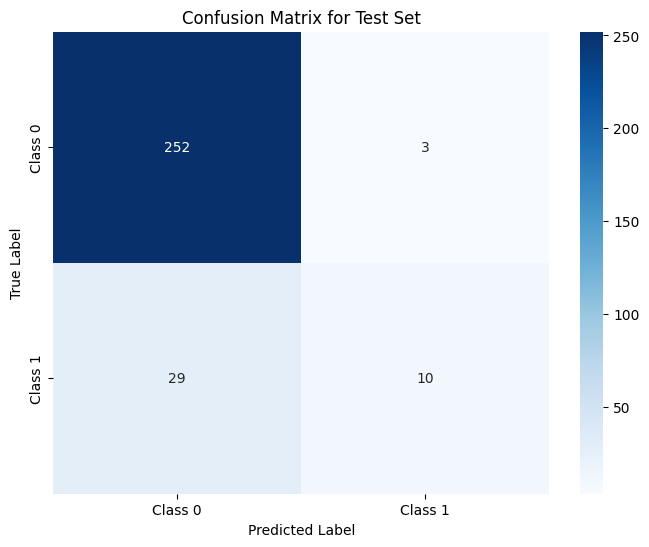

In [22]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()